 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 5. Machine Learning Basis**
# Section 7. Logistic Regression

### _Objective_
1. 분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. <br>
2. 실제로 구현하여 그 결과를 확인합니다.<br>

╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 예제 데이터 ) 암 환자 데이터 셋

In [0]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

--2019-08-07 10:17:00--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.53
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2958 (2.9K) [text/csv]
Saving to: ‘cancer_dataset.csv’

cancer_dataset.csv  100%[===================>]   2.89K  --.-KB/s    in 0s      

2019-08-07 10:17:01 (93.8 MB/s) - ‘cancer_dataset.csv’ saved [2958/2958]



In [0]:
cancer_df.describe()

,age,tumor_size,label
count,100.000000,100.000000,100.00
mean,4.218584,4.463655,0.45
std,1.949688,2.264897,0.50
min,0.494542,0.656397,0.00
25%,2.750747,2.832193,0.00
50%,3.849528,3.766226,0.00
75%,5.405780,5.921538,1.00
max,9.670666,11.170589,1.00


### 데이터 시각화

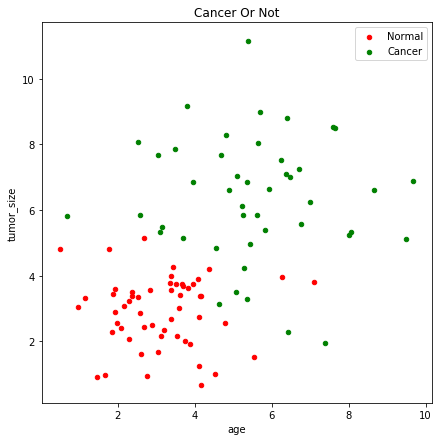

In [0]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(['Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

<br><br>

# \[ 1. 로지스틱 회귀 \]

----

----

> *Logistic 회귀는 특징 정보 간의 관계를 선형적으로 조합한 후,<br>그 값을 확률값으로 바꾸어주는 머신러닝 모델입니다.*<br>
> *선형 회귀와 로지스틱 함수의 조합으로 구성되어 있습니다.*

## 1. 로지스틱 회귀식 설정하기

----

* 현재 암환자 데이터셋의 독립변수로는 tumor_size($x_1$)와 age($x_2$)가 있습니다.
* 종속변수로는 label이 있습니다.

In [0]:
# MinMax Normalization 적용
cancer_df = (cancer_df-cancer_df.min())/(cancer_df.max()-cancer_df.min())

x_1 = cancer_df.tumor_size
x_2 = cancer_df.age
y = cancer_df.label

# weight 모두 0.1로 초기화
w_0,w_1,w_2 = np.random.random(3)

로지스틱 회귀 모델은 아래의 두 단계로 이루어져 있습니다.<br>
$
z = w_0 + w_1x_1 + w_2x_2 \\
y = \frac{1}{1+e^{-z}}
$

In [0]:
z = w_0 + w_1*x_1 + w_2*x_2
prob = 1/(1+np.exp(-z))

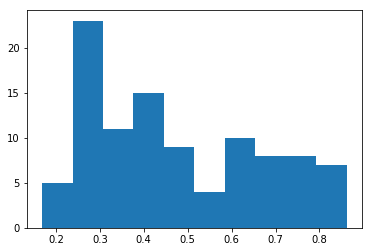

In [0]:
plt.hist(prob)
plt.show()

prob의 값의 범위는 0과 1사이에 위치합니다.

## 2. 손실함수, 미분함수 정의하기

----


### (1) 손실함수 정의하기

이전 시간에 배운 손실함수의 식은 아래와 같이 정의할 수 있습니다.
$$
Loss(W) = \frac{1}{m}\sum_{i=1}^{m}CrossEntropy(y_{true},y_{pred})\\
=- \frac{1}{m}\sum_{i=1}^{m}y_{true}log(y_{pred}) + (1-y_{true})(log(1-y_{pred}))
$$

In [0]:
crossentropy = -np.mean(y*np.log(prob) + (1-y)*np.log(1-prob))
crossentropy

0.4322623882582558

### (2) 미분함수 정의하기

위의 손실함수를 각 Weight 별로 미분해주면, 아래의 수식이 나타나게 됩니다.

$$
\frac{\partial Loss}{\partial W_j} = \frac{1}{m}\sum_{i=1}^{m}(y_{pred}^i - y_{true}^i)x_j^i
$$

*수식을 도출하는 과정은 매우 중요합니다. 따로 과제물로 제공하겠습니다.*

In [0]:
z = w_0 + (w_1*x_1) + (w_2*x_2)
prob = 1/(1+np.exp(-z))

dw0 = np.mean(prob-y)
dw1 = np.mean((prob-y)*x_1)
dw2 = np.mean((prob-y)*x_2)

0.7946446111988261
0.6039962988517443
0.5687394475611673
0.5435391896259658
0.5213077978048569
0.5014203815298641
0.4835560626497729
0.46744930808385726
0.4528739193730253
0.43963696153041115


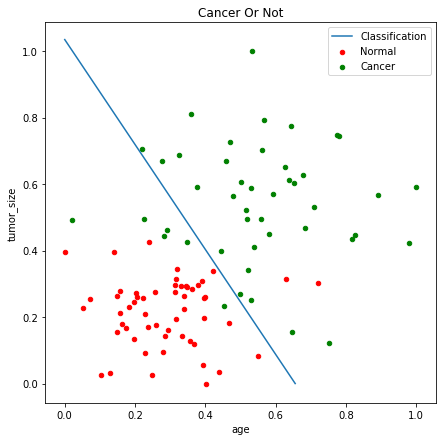

In [0]:
#숙제------------------

#x_1 # tumore size
#X_2 # age


#assert 구문이라고 방어적으로 코딩하는법

loss_hist = []
accuracy_hist = []
w_0,w_1,w_2 = np.random.random(3)

p = cancer_df['label']

lr = 0.05
epoch = 1000

#gradient descent

for i in range(epoch):
  
  logit = w_0 + w_1 * x_1 + w_2 * x_2
  #이제 pred는 logit이라고 쓸겁니다.
  sigmoid = 1/(1+np.exp(-logit))
  #sigmoid 값
  loss = -np.mean((p*np.log(sigmoid)) + (1-p)*(np.log(1-sigmoid)))
  #loss -> cross-entropy
  dw0 = np.mean(sigmoid - p)
  dw1 = np.mean((sigmoid - p)*x_1)
  dw2 = np.mean((sigmoid - p)*x_2) #꼭 mean하기하기
  
  #dw = (sigmoid - p)*[1,x_1,x_2]
  
  #[w_0,w_1,w_2] = [w_0,w_1,w_2]- lr * dw
  #새로 dw 수정
  w_0 = w_0 - dw0 * lr
  w_1 = w_1 - dw1 * lr
  w_2 = w_2 - dw2 * lr
  # 기존 weight 변경
  loss_hist.append(loss)
  if i % 100 == 0:
    print(loss)
  
  pred_cls = np.round(sigmoid)
  accuracy = np.sum(np.equal(pred_cls,y))/len(pred_cls)
  accuracy_hist.append(accuracy)
  
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')

plt.plot([-w_0/w_1,0],[0,-w_0/w_2])
plt.legend(['Classification','Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

## 3. Gradient Descent로 학습하기

----


선형 회귀에서 적용했던 방식과 마찬가지로 아래의 수식을 적용하면 됩니다.

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

학습률과 학습횟수는 아래와 같이 결정하겠습니다.

1. learning Rate : 0.01
2. Epoch : 1000

In [0]:
# 갱신된 weight와 mse 저장
w_0_history = [w_0]
w_1_history = [w_1]
w_2_history = [w_2]
loss_history = [crossentropy]

alpha = 1e-1 # 학습률
epoch = 500

for i in range(epoch):
    # 이전 가중치 가져오기
    old_w_0 = w_0_history[-1]
    old_w_1 = w_1_history[-1]
    old_w_2 = w_2_history[-1]    
    
    # 미분값 갱신
    z = old_w_0 + (old_w_1*x_1) + (old_w_2*x_2)
    prob = 1/(1+np.exp(-z))
    
    dw0 = np.mean(prob-y)
    dw1 = np.mean((prob-y)*x_1)
    dw2 = np.mean((prob-y)*x_2)
    
    # 경사_하강법을 통한 가중치 갱신
    new_w_0 = old_w_0 - alpha * dw0
    new_w_1 = old_w_1 - alpha * dw1
    new_w_2 = old_w_2 - alpha * dw2
    

    crossentropy = -np.mean(y*np.log(prob) + (1-y)*np.log(1-prob))

    # 결과 저장
    w_0_history.append(new_w_0)
    w_1_history.append(new_w_1)
    w_2_history.append(new_w_2)
    loss_history.append(crossentropy)

## 4. 결과 확인하기

----

### (1) 손실함수의 그래프 결과

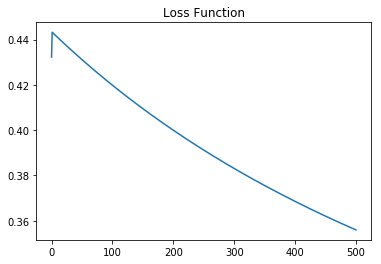

In [0]:
plt.title("Loss Function")
plt.plot(loss_history)
plt.show()

### (2) 정답값과 예측값의 비교

$$
z = w_0 + w_1x_1 + w_2x_2 \\
y = \frac{1}{1+e^{-z}}
$$

$y = 0.5$일 때, $z=0$이 됩니다.<br>
즉 암을 판별하는 경계선은<br>
$$
0 = w_0 + w_1x_1 + w_2x_2
$$
가 됩니다.

In [0]:
new_w0 = w_0_history[-1]
new_w1 = w_1_history[-1]
new_w2 = w_2_history[-1]

x_0 = [-new_w0/new_w1,0] # x_1 절편
y_0 = [0,-new_w0/new_w2] # x_2 절편
print(x_0,y_0)

[0.6686204142685835, 0] [0, 0.9805373292333277]


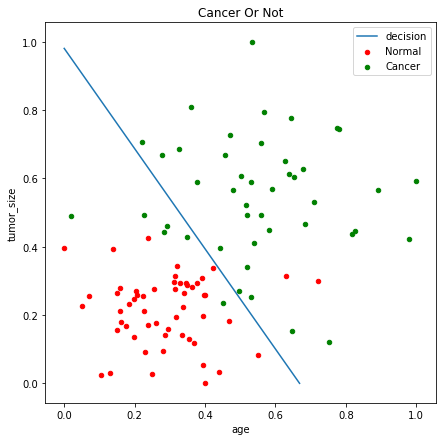

In [0]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(x_0,y_0) # Decision boundary 그리기

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')

# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(["decision",'Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()